In [1]:
# Problem Statement: I have been asked to predict whether customer will purchase a health insurance policy or not based on 
# data provided.

In [2]:
# Steps involved in solving this problem are:
# 1. Importing relevant libraries
# 2. Reading files in notebook
# 3. Data inspection
# 4. Data prepration
# 5. EDA of Data
# 6. Building model
# 7. Choosing the best model for submission
# 8. make submission

In [3]:
# Importing required libraries and modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [4]:
# importing operating system to read files and providing path where my files are located
import os
os.chdir(r"C:\Users\meebh\iim materials\job-hackthon\analytics vidya marathon")

In [5]:
# reading files and saving it as dataframe
train = pd.read_csv("train.csv")

In [6]:
# let's do basic EDA of df

In [7]:
train.head(10) # checking what is stored in it.

ID City_Code  Region_Code Accomodation_Type Reco_Insurance_Type  Upper_Age  \
0   1        C3         3213            Rented          Individual         36   
1   2        C5         1117             Owned               Joint         75   
2   3        C5         3732             Owned          Individual         32   
3   4       C24         4378             Owned               Joint         52   
4   5        C8         2190            Rented          Individual         44   
5   6        C9         1785            Rented          Individual         52   
6   7        C3          679             Owned          Individual         28   
7   8        C1         3175             Owned               Joint         75   
8   9       C15         3497             Owned               Joint         52   
9  10        C1          530             Owned               Joint         59   

   Lower_Age Is_Spouse Health Indicator Holding_Policy_Duration  \
0         36        No               X1                     14+   
1         22        No               X2                     NaN   
2         32        No              NaN                     1.0   
3         48        No               X1                     14+   
4         44        No               X2                     3.0   
5         52        No               X2                     5.0   
6         28        No              NaN                     NaN   
7         73       Yes               X4                     9.0   
8         43        No               X1                    14.0   
9         26       Yes              NaN                     7.0   

   Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium  Response  
0                  3.0               22              11628.0         0  
1                  NaN               22              30510.0         0  
2                  1.0               19               7450.0         1  
3                  3.0               19              17780.0         0  
4                  1.0               16              10404.0         0  
5                  1.0               22              15264.0         1  
6                  NaN               17              10640.0         0  
7                  4.0               17              29344.0         1  
8                  3.0                1              27283.2         0  
9                  4.0               18              21100.8         1

In [8]:
# digging little dipper into my df 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [9]:
## I have total 14 columns and 50882 rows in my dataset

In [10]:
# Checking if my data has any null value
train.isnull().sum()/train.shape[0] *100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           22.976691
Holding_Policy_Duration    39.799929
Holding_Policy_Type        39.799929
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
Response                    0.000000
dtype: float64

In [11]:
# Health Indicator, Holding_Policy_Duration, Holding_Policy_Type column have missing values 22.976691,39.799929, 39.799929
# respectively. 23% and 40% is quite a good portion so we can't ignore these missing values.
# that's why let's fill these missing values with suitable no.

In [12]:
train['Health Indicator'].value_counts() # check variable type of this column to best option for imputing missing values.

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64

In [13]:
# as this column is categorical type, best option is to use mode of column to fill all missing values.

In [14]:
train["Health Indicator"] = train["Health Indicator"].fillna(train["Health Indicator"].mode()[0])

In [15]:
train['Holding_Policy_Duration'].value_counts()
# check variable type of this column to best option for imputing missing values.

1.0     4499
14+     4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: Holding_Policy_Duration, dtype: int64

In [16]:
# same mode of this column will be used to fill missing values.

In [17]:
train["Holding_Policy_Duration"] = train["Holding_Policy_Duration"].fillna(train["Holding_Policy_Duration"].mode()[0])

In [18]:
train['Holding_Policy_Duration'].value_counts()
# check variable type of this column to best option for imputing missing values.

1.0     24750
14+      4335
2.0      4260
3.0      3586
4.0      2771
5.0      2362
6.0      1894
7.0      1645
8.0      1316
9.0      1114
10.0      813
11.0      546
12.0      513
13.0      511
14.0      466
Name: Holding_Policy_Duration, dtype: int64

In [19]:
# this column has continuous variables so use mean method for imputing missing values

In [20]:
train["Holding_Policy_Type"] = train["Holding_Policy_Type"].fillna(train["Holding_Policy_Type"].mean())

In [21]:
train.isnull().sum()/train.shape[0] *100 # let's check missing values once again in train df

ID                         0.0
City_Code                  0.0
Region_Code                0.0
Accomodation_Type          0.0
Reco_Insurance_Type        0.0
Upper_Age                  0.0
Lower_Age                  0.0
Is_Spouse                  0.0
Health Indicator           0.0
Holding_Policy_Duration    0.0
Holding_Policy_Type        0.0
Reco_Policy_Cat            0.0
Reco_Policy_Premium        0.0
Response                   0.0
dtype: float64

In [22]:
# now let's do some feature engineering for this dataset.

In [23]:
# checking for Response column (our target variable)
train['Response'].value_counts()

0    38673
1    12209
Name: Response, dtype: int64

In [24]:
# we have more response with 0 values in comparison to 1 that implies that more customers denied to purchase the policy.  

<AxesSubplot:xlabel='Response', ylabel='count'>

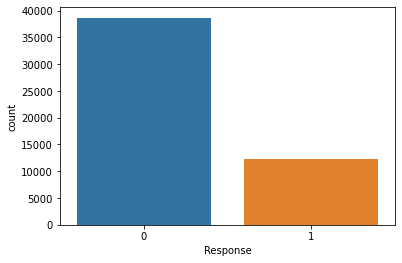

In [25]:
# viewing same with plot
sns.countplot(train['Response'])

In [26]:
#This graph clearly shows that the customers who rejected the purchase are more compared to the customers who 
# responded yes. Hence we say that this is an imbalanced class classification problem

In [27]:
# let's check other columns also

In [28]:
train['Accomodation_Type'].value_counts(normalize=True)

Owned     0.54933
Rented    0.45067
Name: Accomodation_Type, dtype: float64

In [29]:
# we have two types of values here.there is not much difference btw both types in our survey 
#let's check it's impact on our target variable

<AxesSubplot:xlabel='Accomodation_Type', ylabel='count'>

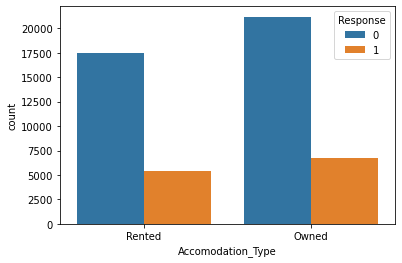

In [30]:
sns.countplot(x=train.Accomodation_Type,hue=train.Response,orient= 'v')

In [31]:
# from this graph we can say that accomodation types makes not much difference in purchasing policy. infact there is slight 
# difference in both types in terms ofpolicy purchase

In [32]:
train['Reco_Insurance_Type'].value_counts(normalize=True) # lets do same for Reco_Insurance_Type column.

Individual    0.796667
Joint         0.203333
Name: Reco_Insurance_Type, dtype: float64

In [33]:
# yes this has huge imbalance. let's see how this impact decision of taking policy

<AxesSubplot:xlabel='Reco_Insurance_Type', ylabel='count'>

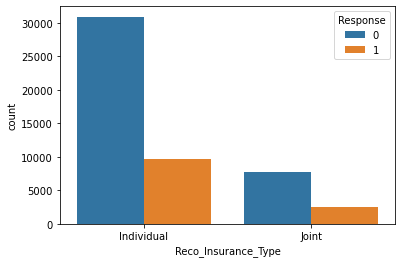

In [34]:
sns.countplot(x=train.Reco_Insurance_Type,hue=train.Response)

In [35]:
# from this barchart we can conclude that customer with individual Reco_Insurance have high chance of denying the policy.

In [36]:
train['Is_Spouse'].value_counts(normalize=True) ## let's check what difference is made by spouse.

No     0.83448
Yes    0.16552
Name: Is_Spouse, dtype: float64

In [37]:
# we have more responses from unmarried (single) customers. 

<AxesSubplot:xlabel='Is_Spouse', ylabel='count'>

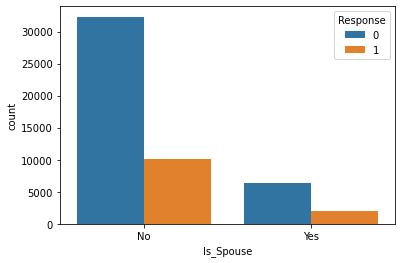

In [38]:
sns.countplot(x=train.Is_Spouse,hue=train.Response)

In [39]:
# one-third of customers with sigle marital status purchased the policy while more or less same is true for married customers

In [40]:
# let's check for ordinal variables

<Figure size 720x360 with 0 Axes>

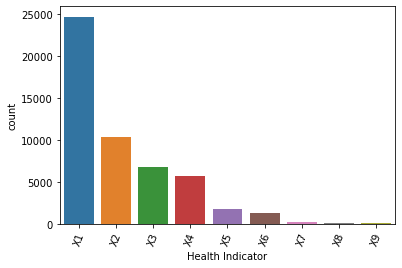

<Figure size 720x360 with 0 Axes>

In [41]:
chart = sns.countplot(train['Health Indicator'],order = train['Health Indicator'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(),rotation=70)
plt.figure(figsize=(10,5))

<AxesSubplot:xlabel='Reco_Policy_Premium', ylabel='count'>

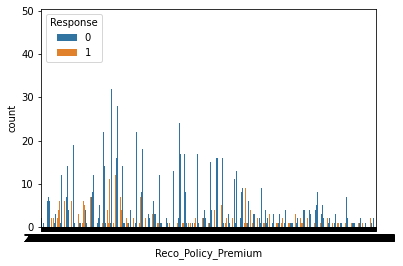

In [42]:
sns.countplot(x=train.Reco_Policy_Premium,hue=train.Response) #let's check what this column speaks

<AxesSubplot:ylabel='Reco_Policy_Cat'>

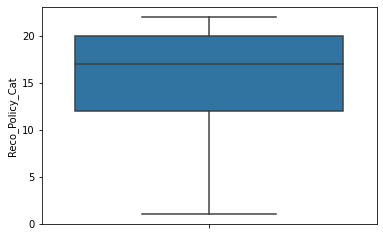

In [43]:
sns.boxplot(y=train.Reco_Policy_Cat)

In [44]:
# There are no outlier in  Reco_Policy_Cat. infact more data point lies below 17.

<AxesSubplot:ylabel='Reco_Policy_Premium'>

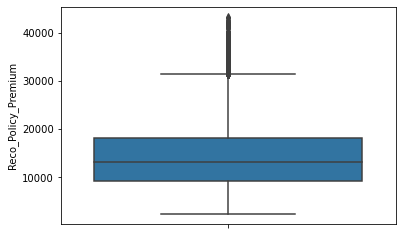

In [45]:
sns.boxplot(y=train.Reco_Policy_Premium)

In [46]:
# from this boxplot we can conclude that mean of data point lies somewhere around 15k.

<AxesSubplot:ylabel='Upper_Age'>

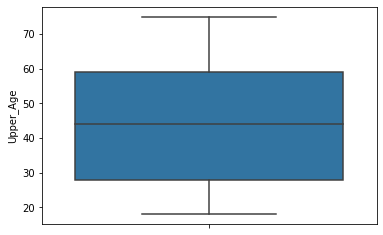

In [47]:
sns.boxplot(y=train.Upper_Age)

<AxesSubplot:xlabel='Upper_Age', ylabel='count'>

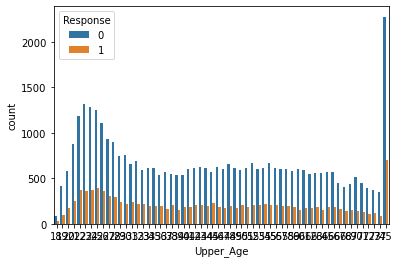

In [48]:
sns.countplot(x=train.Upper_Age,hue=train.Response)

In [49]:
# graph clearly states that most people lies below 45 years.

<AxesSubplot:ylabel='Lower_Age'>

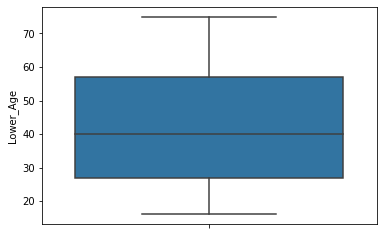

In [50]:
sns.boxplot(y=train.Lower_Age)

In [51]:
# mean in the lower age is 40 years.

<AxesSubplot:xlabel='Lower_Age', ylabel='count'>

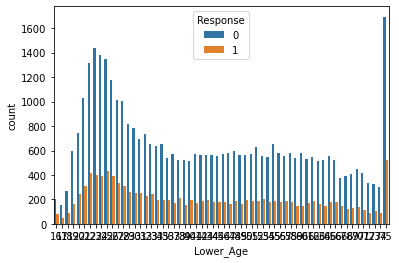

In [52]:
sns.countplot(x=train.Lower_Age,hue=train.Response)

In [53]:
train['Reco_Policy_Premium'].value_counts(normalize=True)

10080.0    0.001199
11880.0    0.001160
12060.0    0.001140
9296.0     0.001101
11520.0    0.001061
             ...   
21918.0    0.000020
23331.0    0.000020
4336.0     0.000020
31404.8    0.000020
17955.0    0.000020
Name: Reco_Policy_Premium, Length: 6977, dtype: float64

In [54]:
# now let's prepare our df so that ML algorithm can be applied on it.

In [55]:
# first and foremost thing is to do encoding for our categorical variables. 
# for this i am importing LabelEncoder from prepocessing module of scikit learn library.
# let's start with ordinal one.

In [56]:
#Ordinal Columns to perform Label Encoding
columns_to_le = ["Accomodation_Type","Reco_Insurance_Type","Health Indicator"]
#Label Encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in columns_to_le:
    train[col] = le.fit_transform(train[col])

In [57]:
columns_to_oe = ["Is_Spouse"]
#Label Encoding the Nominal categorical columns
from category_encoders import OneHotEncoder
oe = OneHotEncoder(cols = columns_to_oe)
train = oe.fit_transform(train)

In [58]:
# city_code column will not help in our modeling so i am deleting this column.

In [59]:
train.drop(axis=1,columns=['City_Code'],inplace=True)

In [60]:
# Holding_Policy_Duration column has one value as 14+. we have to remove it else ml will throw error. therefore
# i am replacing it with 15 

In [61]:
train["Holding_Policy_Duration"].replace("14+",15,inplace=True)

In [62]:
# now let's separate dataset into feature and label first then into traing and testing sets.

In [63]:
# feature and label separation
X = train.iloc[:,:-1].values
y = train.iloc[:,-1].values

In [64]:
# traing and testing sets
from sklearn.model_selection import train_test_split

#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1, random_state = 0)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4, 
                                                 random_state = 51, stratify = y)

In [65]:
# i will be using decision tree to get model. so first import DecisionTreeClassifier

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
# let's train the model 

In [68]:
dectree = DecisionTreeClassifier(max_depth=4, random_state = 51)
dectree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=51)

In [69]:
# let's predict by using xtest

In [70]:
y_predict_dtree = dectree.predict(X_test)

In [71]:
# now let's evaluate how accurate our model is 

In [72]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix, roc_curve, auc


In [73]:
accuracy_score(y_test,y_predict_dtree)

0.7596914459784798

In [74]:
f1_score(y_test,y_predict_dtree)

0.0024474811339995923

In [75]:
probs = dectree.predict_proba(X_test)
prob_positive = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test,prob_positive)
roc_auc = auc(fpr,tpr)
roc_auc

0.5943459731277302

In [76]:
confusion_matrix = metrics.confusion_matrix(X_train,X_test,y_train,y_test,  
                                            test_pred_decision_tree)

NameError: name 'test_pred_decision_tree' is not defined

In [ ]:
# when i kept random state at 51, and maxdepth at 4 my model got highest roc_auc

In [ ]:
# now  our model is ready. lets try to use it for prediction of new datasets. for this i have a other dataset named test.

In [ ]:
test = pd.read_csv("test.csv") # reading test dataset and storing it in df

In [ ]:
# we will apply same data cleaning and data prepration method for this new df. 
# let's start with basic EDA

In [ ]:
test.head()

In [ ]:
# this df has no column name response else everything thing is similar to previous df. therefore we can move ahead.

In [ ]:
test.isnull().sum()/test.shape[0] *100    # checking null values in test df

In [ ]:
# Health Indicator, Holding_Policy_Duration, Holding_Policy_Type column have missing values 22.976691,39.799929, 39.799929
# respectively.

In [ ]:
# applying same approach here also.

In [ ]:
# using mode value for filling missing values
test["Health Indicator"] = test["Health Indicator"].fillna(test["Health Indicator"].mode()[0])

In [ ]:
test["Holding_Policy_Duration"] = test["Holding_Policy_Duration"].fillna(test["Holding_Policy_Duration"].mode()[0])

In [ ]:
test["Holding_Policy_Type"] = test["Holding_Policy_Type"].fillna(test["Holding_Policy_Type"].mean())

In [ ]:
# done with cleaning part let's prepare data now

In [ ]:
columns_to_le = ["Accomodation_Type","Reco_Insurance_Type","Health Indicator"]
#Label Encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in columns_to_le:
    test[col] = le.fit_transform(test[col])

In [ ]:
test["Holding_Policy_Duration"].replace("14+",15,inplace=True)

In [ ]:
columns_to_oe = ["Is_Spouse"]
#Label Encoding the Nominal categorical columns
from category_encoders import OneHotEncoder
oe = OneHotEncoder(cols = columns_to_oe)
test = oe.fit_transform(test)

In [ ]:
test.drop(axis=1,columns=['City_Code'],inplace=True)

In [ ]:
# my df is ready. let's pass it in our trained model and predict which customer is likely to purchase my health insurance.

In [ ]:
y_predict_dtree = dectree.predict(test) #this is my predictions. let's save result in format provided.

In [ ]:
submission = pd.read_csv('sample_submission.csv')
final_predictions =y_predict_dtree
submission['Response'] = final_predictions
#only positive predictions for the target variable
submission['Response'] = submission['Response'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('my_submission5.csv', index=False)